In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ondjiva
Processing Record 2 of Set 1 | hasaki
Processing Record 3 of Set 1 | yomou
Processing Record 4 of Set 1 | viedma
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | mahaicony
City not found. Skipping...
Processing Record 8 of Set 1 | darhan
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | buin
Processing Record 13 of Set 1 | la guama
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | pingzhuang
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | havoysund
Processing Record 19 of Set 1 | nizhniy tsasuchey
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of Set 1 | simao
Processing Record 23 of Set 1 | vaini
Processing Record 

Processing Record 39 of Set 4 | stromness
Processing Record 40 of Set 4 | morehead
Processing Record 41 of Set 4 | kirakira
Processing Record 42 of Set 4 | cabinda
Processing Record 43 of Set 4 | quelimane
Processing Record 44 of Set 4 | plettenberg bay
Processing Record 45 of Set 4 | ayan
Processing Record 46 of Set 4 | upornaya
Processing Record 47 of Set 4 | kruisfontein
Processing Record 48 of Set 4 | ahipara
Processing Record 49 of Set 4 | rivadavia
Processing Record 50 of Set 4 | dalby
Processing Record 1 of Set 5 | kavaratti
Processing Record 2 of Set 5 | ajdabiya
Processing Record 3 of Set 5 | nome
Processing Record 4 of Set 5 | riyadh
Processing Record 5 of Set 5 | havelock
Processing Record 6 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 7 of Set 5 | marrakesh
Processing Record 8 of Set 5 | riverside
Processing Record 9 of Set 5 | teknaf
Processing Record 10 of Set 5 | dakar
Processing Record 11 of Set 5 | auxerre
Processing Record 12 of Set 5 | aksu
Proce

Processing Record 26 of Set 8 | varhaug
Processing Record 27 of Set 8 | banjar
Processing Record 28 of Set 8 | marsa matruh
Processing Record 29 of Set 8 | laguna
Processing Record 30 of Set 8 | paraiso
Processing Record 31 of Set 8 | naron
Processing Record 32 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 33 of Set 8 | sorland
Processing Record 34 of Set 8 | poum
Processing Record 35 of Set 8 | ouadda
Processing Record 36 of Set 8 | panama city
Processing Record 37 of Set 8 | ciudad bolivar
Processing Record 38 of Set 8 | kuytun
Processing Record 39 of Set 8 | nouakchott
Processing Record 40 of Set 8 | karaul
City not found. Skipping...
Processing Record 41 of Set 8 | berlin
Processing Record 42 of Set 8 | patea
Processing Record 43 of Set 8 | souillac
Processing Record 44 of Set 8 | bambanglipuro
Processing Record 45 of Set 8 | mana
Processing Record 46 of Set 8 | elat
Processing Record 47 of Set 8 | bara
Processing Record 48 of Set 8 | broome
Processing Record 49

Processing Record 15 of Set 12 | wanning
Processing Record 16 of Set 12 | wenling
Processing Record 17 of Set 12 | zlatoustovsk
City not found. Skipping...
Processing Record 18 of Set 12 | avera
Processing Record 19 of Set 12 | gilazi
City not found. Skipping...
Processing Record 20 of Set 12 | richards bay
Processing Record 21 of Set 12 | ambovombe
Processing Record 22 of Set 12 | manitowoc
Processing Record 23 of Set 12 | balikpapan
Processing Record 24 of Set 12 | lingao
Processing Record 25 of Set 12 | teya
Processing Record 26 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 27 of Set 12 | topolobampo
Processing Record 28 of Set 12 | okandja
City not found. Skipping...
Processing Record 29 of Set 12 | olinda
Processing Record 30 of Set 12 | san ignacio
Processing Record 31 of Set 12 | lorengau
Processing Record 32 of Set 12 | seinajoki
Processing Record 33 of Set 12 | amga
Processing Record 34 of Set 12 | dekoa
City not found. Skipping...
Processing Record 35 of 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ondjiva,-17.0667,15.7333,67.35,83,100,5.21,AO,2022-02-05 02:17:40
1,Hasaki,35.7333,140.8333,45.28,38,6,18.07,JP,2022-02-05 02:08:51
2,Yomou,7.5603,-9.2653,65.34,58,2,0.74,GN,2022-02-05 02:17:40
3,Viedma,-40.8135,-62.9967,64.09,68,100,21.94,AR,2022-02-05 02:17:41
4,Puerto Ayora,-0.7393,-90.3518,75.54,92,75,3.00,EC,2022-02-05 02:17:41
5,Punta Arenas,-53.1500,-70.9167,46.51,71,0,3.44,CL,2022-02-05 02:17:42
6,Darhan,49.4867,105.9228,-4.72,93,21,5.99,MN,2022-02-05 02:17:42
7,Longyearbyen,78.2186,15.6401,15.64,53,20,20.71,SJ,2022-02-05 02:17:42
8,Busselton,-33.6500,115.3333,95.09,30,14,6.62,AU,2022-02-05 02:17:43
9,Kapaa,22.0752,-159.3190,78.78,80,40,8.05,US,2022-02-05 02:17:43


In [12]:
city_data_columns = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
#city_data_columns = [1,8,9,2,3,4,5,6,7]
city_data_df = city_data_df[city_data_columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ondjiva,AO,2022-02-05 02:17:40,-17.0667,15.7333,67.35,83,100,5.21
1,Hasaki,JP,2022-02-05 02:08:51,35.7333,140.8333,45.28,38,6,18.07
2,Yomou,GN,2022-02-05 02:17:40,7.5603,-9.2653,65.34,58,2,0.74
3,Viedma,AR,2022-02-05 02:17:41,-40.8135,-62.9967,64.09,68,100,21.94
4,Puerto Ayora,EC,2022-02-05 02:17:41,-0.7393,-90.3518,75.54,92,75,3.00
5,Punta Arenas,CL,2022-02-05 02:17:42,-53.1500,-70.9167,46.51,71,0,3.44
6,Darhan,MN,2022-02-05 02:17:42,49.4867,105.9228,-4.72,93,21,5.99
7,Longyearbyen,SJ,2022-02-05 02:17:42,78.2186,15.6401,15.64,53,20,20.71
8,Busselton,AU,2022-02-05 02:17:43,-33.6500,115.3333,95.09,30,14,6.62
9,Kapaa,US,2022-02-05 02:17:43,22.0752,-159.3190,78.78,80,40,8.05


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644029138.8293176

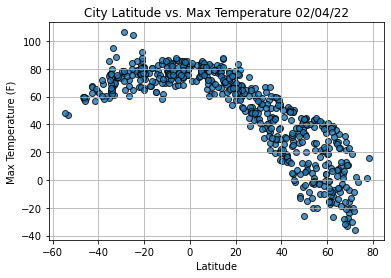

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

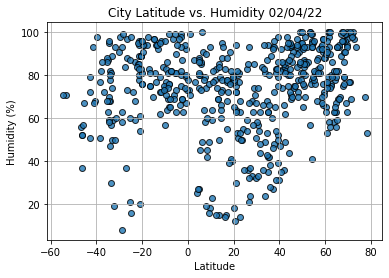

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

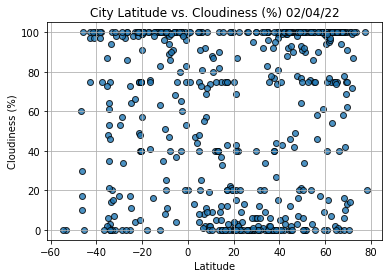

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

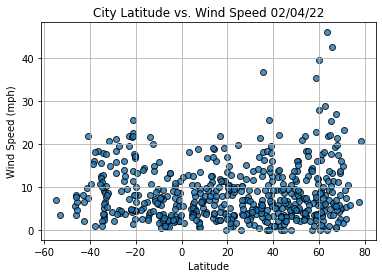

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()